In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Load 3 datasets
df1=pd.read_csv('dataset1.csv')
df2=pd.read_csv('dataset2.csv')
df3=pd.read_csv('dataset3.csv')

In [37]:
#Describe dataset 
def describe_data(df,dataset_name):
    print(f"Describe of {dataset_name}:")
    print(df.describe(include='all'))
    print("\n")
    print(f"The first 5 rows {dataset_name}:")
    print(df.head())
    print("\n")
    print(f"The rows and columns of {dataset_name}: {df.shape}")

#Describe each dataset
describe_data(df1,'dataset1')
describe_data(df2,'dataset2')
describe_data(df3,'dataset3')

Describe of dataset1:
                 ID         gender       minority       deprived
count  1.201150e+05  120115.000000  120115.000000  120115.000000
mean   1.060058e+06       0.475819       0.240761       0.434800
std    3.467436e+04       0.499417       0.427547       0.495733
min    1.000001e+06       0.000000       0.000000       0.000000
25%    1.030030e+06       0.000000       0.000000       0.000000
50%    1.060058e+06       0.000000       0.000000       0.000000
75%    1.090086e+06       1.000000       0.000000       1.000000
max    1.120115e+06       1.000000       1.000000       1.000000


The first 5 rows dataset1:
        ID  gender  minority  deprived
0  1087360       0         0         0
1  1088938       0         1         0
2  1088953       0         1         0
3  1088961       0         1         0
4  1089147       0         1         0


The rows and columns of dataset1: (120115, 4)
Describe of dataset2:
                 ID           C_we           C_wk           

In [38]:
def check_nulls_and_duplicates(df, dataset_name):
     # Check for null values
    null_count = df.isnull().sum()
    print(f"Number of null values in each column in {dataset_name}:\n{null_count}")
      # Check for duplicate rows
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows in {dataset_name}: {duplicate_count}")
    print ("\n")
check_nulls_and_duplicates(df1, "dataset1")
check_nulls_and_duplicates(df2, "dataset2")
check_nulls_and_duplicates(df3, "dataset3")

Number of null values in each column in dataset1:
ID          0
gender      0
minority    0
deprived    0
dtype: int64
Number of duplicate rows in dataset1: 0


Number of null values in each column in dataset2:
ID      0
C_we    0
C_wk    0
G_we    0
G_wk    0
S_we    0
S_wk    0
T_we    0
T_wk    0
dtype: int64
Number of duplicate rows in dataset2: 0


Number of null values in each column in dataset3:
ID        0
Optm      0
Usef      0
Relx      0
Intp      0
Engs      0
Dealpr    0
Thcklr    0
Goodme    0
Clsep     0
Conf      0
Mkmind    0
Loved     0
Intthg    0
Cheer     0
dtype: int64
Number of duplicate rows in dataset3: 0




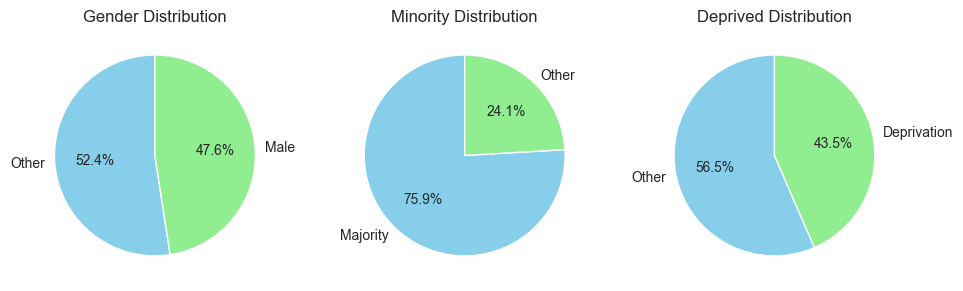

In [39]:
df=pd.read_csv('dataset1.csv')

label_mapping = {
    'gender': {0: 'Other', 1: 'Male'},
    'minority': {0: 'Majority', 1: 'Other'},
    'deprived': {0: 'Other', 1: 'Deprivation'}
}

# List of columns
columns = ["gender", "minority", "deprived"]

# Calculate the percentage for each category in each column
percentages = {}
labels = {}

for column in columns:
    percentages[column] = df[column].value_counts(normalize=True) * 100
    labels[column] = percentages[column].index.map(label_mapping[column])

# Create three pie charts for the three groups
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plotting pie charts for each group with labels
for i, column in enumerate(columns):
    axes[i].pie(percentages[column].sort_index(), labels=labels[column], 
                autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
    axes[i].set_title(f'{column.capitalize()} Distribution')

# Adjust layout to ensure titles and labels fit well
plt.tight_layout()
plt.show()


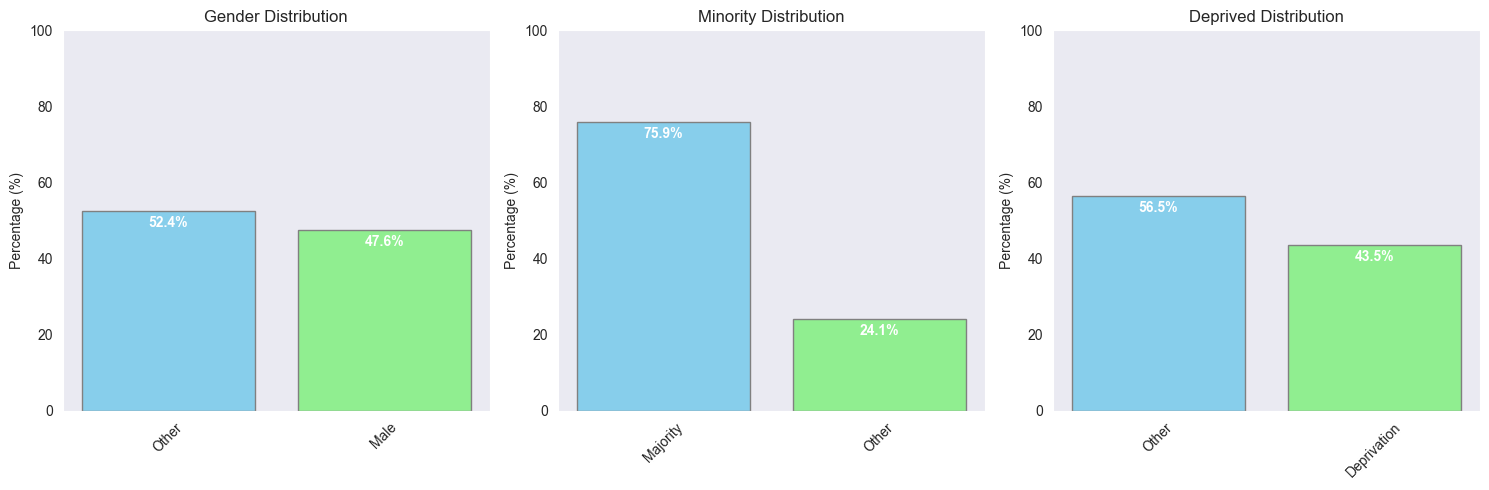

In [40]:
df=pd.read_csv('dataset1.csv')
label_mapping = {
    'gender': {0: 'Other', 1: 'Male'},
    'minority': {0: 'Majority', 1: 'Other'},
    'deprived': {0: 'Other', 1: 'Deprivation'}
}

# List of columns
columns = ["gender", "minority", "deprived"]

# Calculate the percentage for each category in each column
percentages = {}
labels = {}

for column in columns:
    percentages[column] = df[column].value_counts(normalize=True) * 100
    labels[column] = percentages[column].index.map(label_mapping[column])

# Create three clustered bar charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bar charts for each group with labels
for i, column in enumerate(columns):
    # Bar positions
    bars = np.arange(len(percentages[column].sort_index()))
    
    # Bar chart for each column
    bar_plot = axes[i].bar(bars, percentages[column].sort_index(), color=['skyblue', 'lightgreen', 'salmon'], edgecolor='grey')
    
    # Set the labels and title
    axes[i].set_xticks(bars)
    axes[i].set_xticklabels(labels[column], rotation=45)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_title(f'{column.capitalize()} Distribution')
    
    # Add percentage text inside the bars
    for bar, percentage in zip(bar_plot, percentages[column].sort_index()):
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{percentage:.1f}%', 
                     ha='center', va='bottom', color='white', fontweight='bold')
    
    # Set y-axis limit to 100%
    axes[i].set_ylim(0, 100)
    
    # Remove grid
    axes[i].grid(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

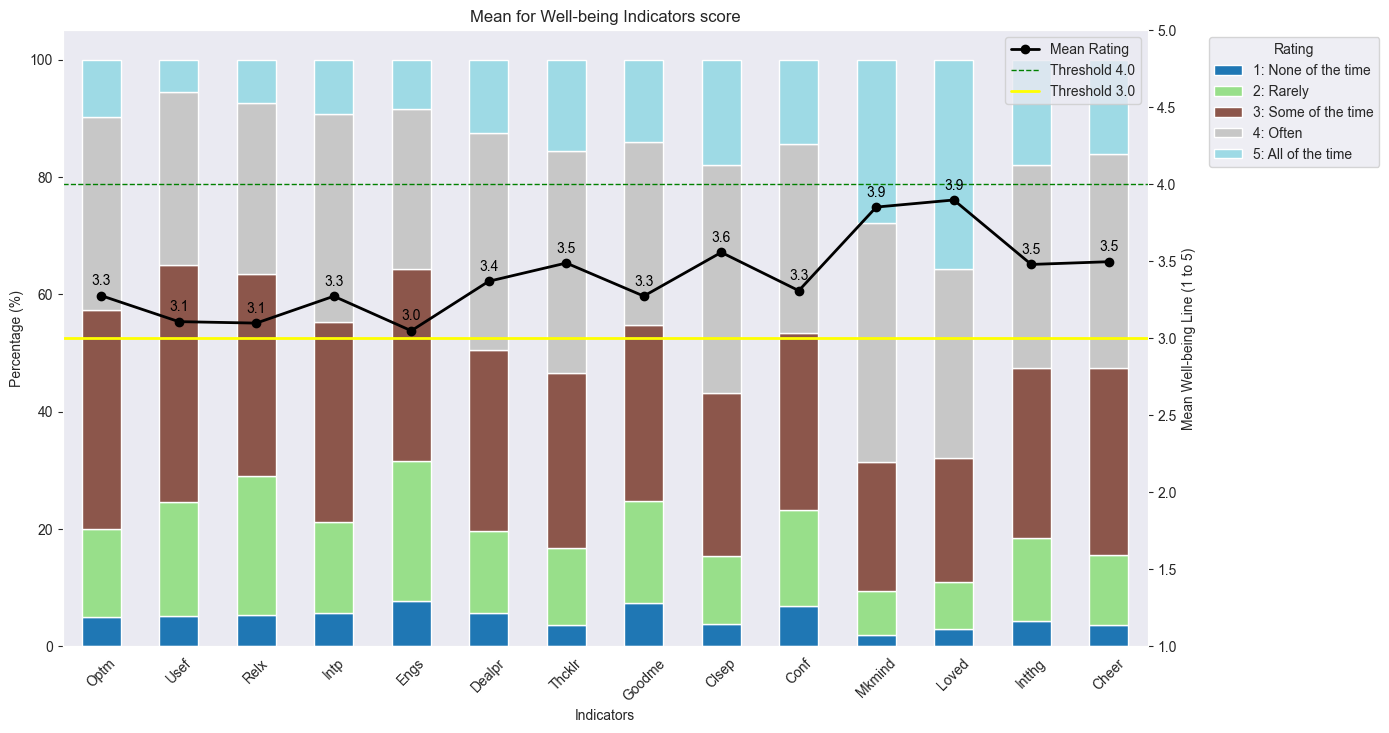

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe 'df' is already loaded

# Get all indicators (excluding 'ID')
indicators = df3.columns[1:]

# Calculate the proportion of each rating for each indicator (normalize=True gives proportion)
stacked_data = df3[indicators].apply(pd.Series.value_counts, normalize=True).sort_index() * 100  # Convert to percentage

# Calculate the mean rating for each indicator
mean_ratings = df3[indicators].mean()

# Define detailed labels for the ratings
detailed_labels = {
    1: "1: None of the time",
    2: "2: Rarely",
    3: "3: Some of the time",
    4: "4: Often",
    5: "5: All of the time"
}

# Plot the stacked bar chart
plt.figure(figsize=(10,6))
ax = stacked_data.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Plot the line chart on the same axis for mean ratings
ax2 = ax.twinx()
line = ax2.plot(mean_ratings, color='black', marker='o', linestyle='-', linewidth=2, label='Mean Rating')

# Add mean rating numbers to each dot, rounded to 1 decimal place
for i, value in enumerate(mean_ratings):
    ax2.text(i, value + 0.05, f'{value:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Set the y-axis range for the mean ratings (ax2) to be from 1 to 5
ax2.set_ylim(1, 5)

# Add horizontal lines at 4.0 and 3.0 on ax2
ax2.axhline(4.0, color='green', linestyle='--', linewidth=1, label='Threshold 4.0')
ax2.axhline(3.0, color='yellow', linestyle='-', linewidth=2, label='Threshold 3.0')

# Titles and labels
ax.set_title('Mean for Well-being Indicators score')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Indicators')
ax.set_xticklabels(indicators, rotation=45)
ax2.set_ylabel('Mean Well-being Line (1 to 5)')

# Turn off the grid
plt.grid(False)
ax.grid(False)

# Update legend with detailed labels
handles, labels = ax.get_legend_handles_labels()
labels = [detailed_labels[int(label)] for label in labels]
ax.legend(handles, labels, title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Legend for mean rating line and threshold lines
ax2.legend(loc='upper right')

plt.show()


In [45]:
df=pd.merge(df1,df2, on='ID', how='inner')

In [46]:
df=pd.merge(df,df3, on='ID',how='inner')

In [47]:
df.shape

(98278, 26)

In [48]:
df.to_csv('data.csv', index=False)

In [49]:
#Checking nulls and duplicates
check_nulls_and_duplicates(df, "data")

Number of null values in each column in data:
ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64
Number of duplicate rows in data: 0




In [50]:
describe_data(df,'data')

Describe of data:
                 ID        gender      minority      deprived          C_we  \
count  9.827800e+04  98278.000000  98278.000000  98278.000000  98278.000000   
mean   1.059895e+06      0.472059      0.226572      0.424022      2.198483   
std    3.479310e+04      0.499221      0.418615      0.494196      2.069802   
min    1.000002e+06      0.000000      0.000000      0.000000      0.000000   
25%    1.029695e+06      0.000000      0.000000      0.000000      0.500000   
50%    1.059692e+06      0.000000      0.000000      0.000000      2.000000   
75%    1.090143e+06      1.000000      0.000000      1.000000      3.000000   
max    1.120115e+06      1.000000      1.000000      1.000000      7.000000   

               C_wk          G_we          G_wk          S_we          S_wk  \
count  98278.000000  98278.000000  98278.000000  98278.000000  98278.000000   
mean       1.768092      1.726332      0.997828      3.504085      2.889604   
std        1.722842      2.159675

In [51]:
# Load the dataset
df = pd.read_csv('data.csv')

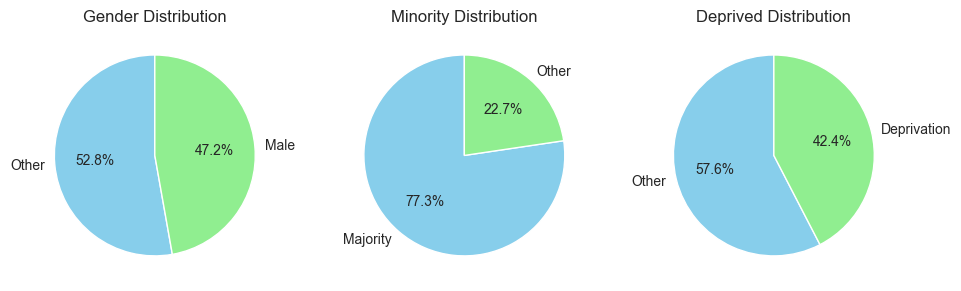

In [52]:
# Assuming your columns have binary or categorical data and need meaningful labels:
label_mapping = {
    'gender': {0: 'Other', 1: 'Male'},
    'minority': {0: 'Majority', 1: 'Other'},
    'deprived': {0: 'Other', 1: 'Deprivation'}
}

# List of columns
columns = ["gender", "minority", "deprived"]

# Calculate the percentage for each category in each column
percentages = {}
labels = {}

for column in columns:
    percentages[column] = df[column].value_counts(normalize=True) * 100
    labels[column] = percentages[column].index.map(label_mapping[column])

# Create three pie charts for the three groups
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plotting pie charts for each group with labels
for i, column in enumerate(columns):
    axes[i].pie(percentages[column].sort_index(), labels=labels[column], 
                autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
    axes[i].set_title(f'{column.capitalize()} Distribution')

# Adjust layout to ensure titles and labels fit well
plt.tight_layout()
plt.show()



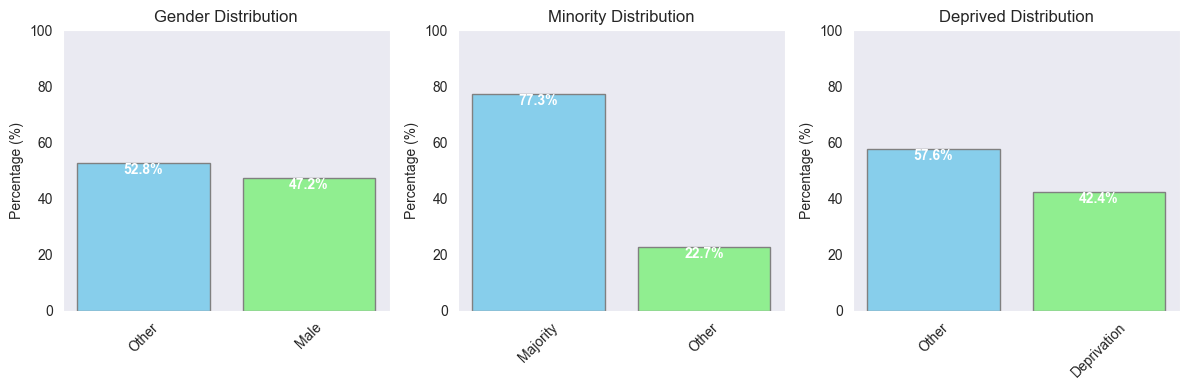

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your columns have binary or categorical data and need meaningful labels:
label_mapping = {
    'gender': {0: 'Other', 1: 'Male'},
    'minority': {0: 'Majority', 1: 'Other'},
    'deprived': {0: 'Other', 1: 'Deprivation'}
}

# List of columns
columns = ["gender", "minority", "deprived"]

# Calculate the percentage for each category in each column
percentages = {}
labels = {}

for column in columns:
    percentages[column] = df[column].value_counts(normalize=True) * 100
    labels[column] = percentages[column].index.map(label_mapping[column])

# Create three clustered bar charts
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting bar charts for each group with labels
for i, column in enumerate(columns):
    # Bar positions
    bars = np.arange(len(percentages[column].sort_index()))
    
    # Bar chart for each column
    bar_plot = axes[i].bar(bars, percentages[column].sort_index(), color=['skyblue', 'lightgreen', 'salmon'], edgecolor='grey')
    
    # Set the labels and title
    axes[i].set_xticks(bars)
    axes[i].set_xticklabels(labels[column], rotation=45)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_title(f'{column.capitalize()} Distribution')
    
    # Add percentage text inside the bars
    for bar, percentage in zip(bar_plot, percentages[column].sort_index()):
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{percentage:.1f}%', 
                     ha='center', va='bottom', color='white', fontweight='bold')
    
    # Set y-axis limit to 100%
    axes[i].set_ylim(0, 100)
    
    # Remove grid
    axes[i].grid(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


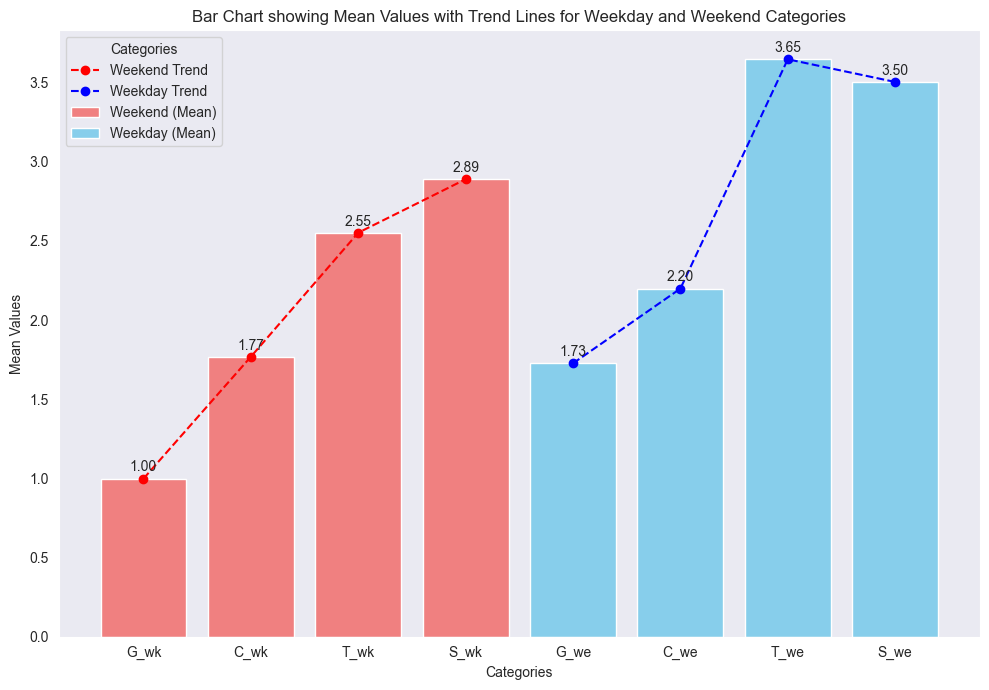

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting relevant columns for the stack bar chart
columns_of_interest = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
df_selected = df[columns_of_interest]

# Calculate the mean for each bar
mean_values = df_selected.mean()

# Define x1 for weekend and x2 for weekday
x1 = ['G_wk', 'C_wk','T_wk','S_wk']  # Weekend categories
x2 = ['G_we', 'C_we','T_we','S_we']  # Weekday categories

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot for weekday and weekend groups
bars_weekend = ax.bar(x1, mean_values[x1], label='Weekend (Mean)', color='lightcoral')
bars_weekday = ax.bar(x2, mean_values[x2], label='Weekday (Mean)', color='skyblue')

# Adding trend lines for each group
# For weekend
weekend_indices = np.arange(len(x1))
ax.plot(weekend_indices, mean_values[x1], color='red', marker='o', linestyle='--', label='Weekend Trend')

# For weekday
weekday_indices = np.arange(len(x1), len(x1) + len(x2))
ax.plot(weekday_indices, mean_values[x2], color='blue', marker='o', linestyle='--', label='Weekday Trend')

# Adding labels and title
ax.set_ylabel('Mean Values')
ax.set_xlabel('Categories')
ax.set_xticks(np.arange(len(x1 + x2)))
ax.set_xticklabels(x1 + x2)
ax.set_title('Bar Chart showing Mean Values with Trend Lines for Weekday and Weekend Categories')

# Adding mean values on top of each bar
for bar in bars_weekend:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars_weekday:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Remove grid
ax.grid(False)

# Adding legend
ax.legend(title='Categories')

# Show plot
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

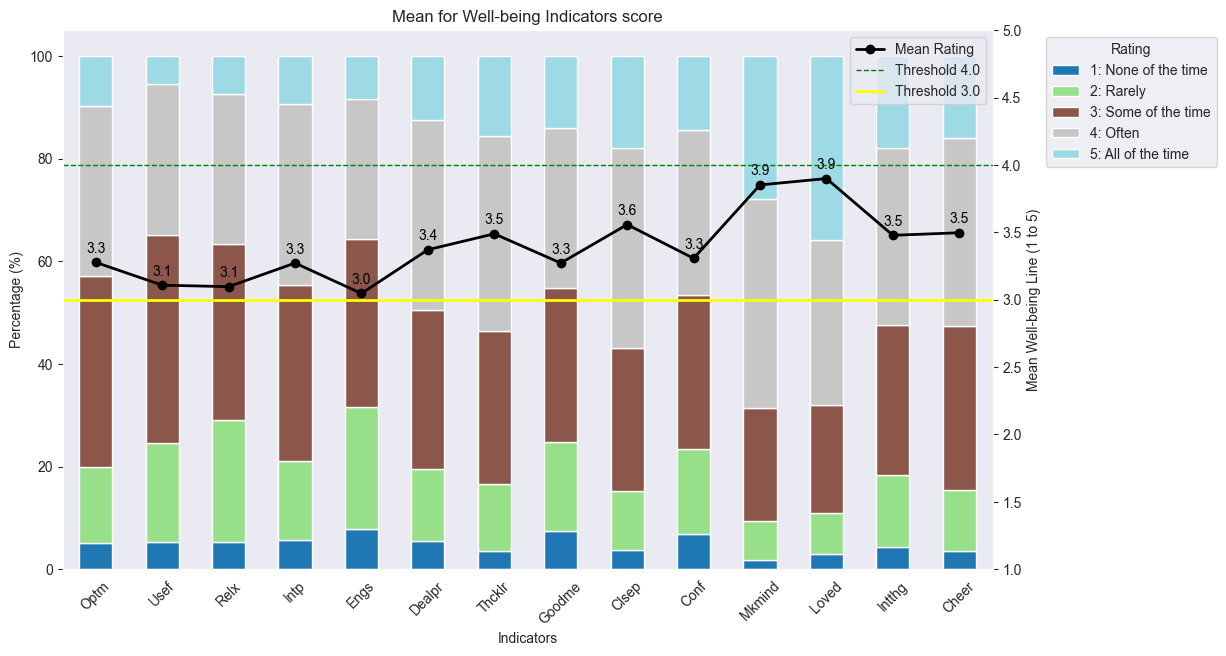

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting the indicator columns from df
indicators = df[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']]

# Calculate the proportion of each rating for each indicator (normalize=True gives proportion)
stacked_data = indicators.apply(lambda x: pd.Series(x.value_counts(normalize=True)).sort_index() * 100, axis=0)

# Calculate the mean rating for each indicator
mean_ratings = indicators.mean()

# Define detailed labels for the ratings
detailed_labels = {
    1: "1: None of the time",
    2: "2: Rarely",
    3: "3: Some of the time",
    4: "4: Often",
    5: "5: All of the time"
}

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))
ax = stacked_data.T.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# Plot the line chart on the same axis for mean ratings
ax2 = ax.twinx()
line = ax2.plot(mean_ratings.index, mean_ratings, color='black', marker='o', linestyle='-', linewidth=2, label='Mean Rating')

# Add mean rating numbers to each dot, rounded to 1 decimal place
for i, value in enumerate(mean_ratings):
    ax2.text(i, value + 0.05, f'{value:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Set the y-axis range for the mean ratings (ax2) to be from 1 to 5
ax2.set_ylim(1, 5)

# Add horizontal lines at 4.0 and 3.0 on ax2
ax2.axhline(4.0, color='green', linestyle='--', linewidth=1, label='Threshold 4.0')
ax2.axhline(3.0, color='yellow', linestyle='-', linewidth=2, label='Threshold 3.0')

# Titles and labels
ax.set_title('Mean for Well-being Indicators score')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Indicators')
ax.set_xticklabels(indicators.columns, rotation=45)
ax2.set_ylabel('Mean Well-being Line (1 to 5)')

# Turn off the grid
ax.grid(False)

# Update legend with detailed labels
handles, labels = ax.get_legend_handles_labels()
labels = [detailed_labels.get(int(label), label) for label in labels]
ax.legend(handles, labels, title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Legend for mean rating line and threshold lines
ax2.legend(loc='upper right')
# Turn off the grid
plt.grid(False)
ax.grid(False)

# Show plot
plt.show()


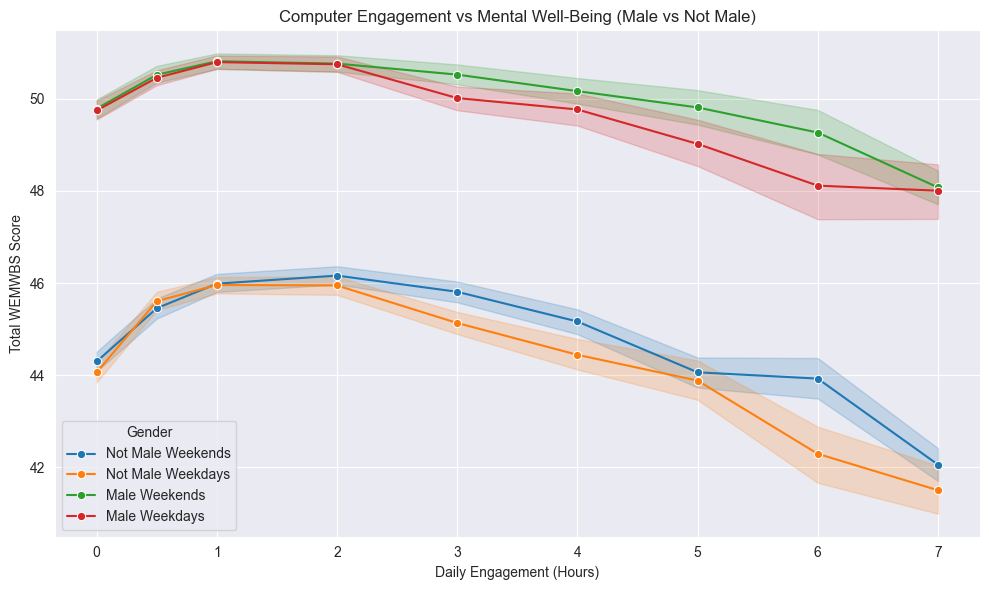

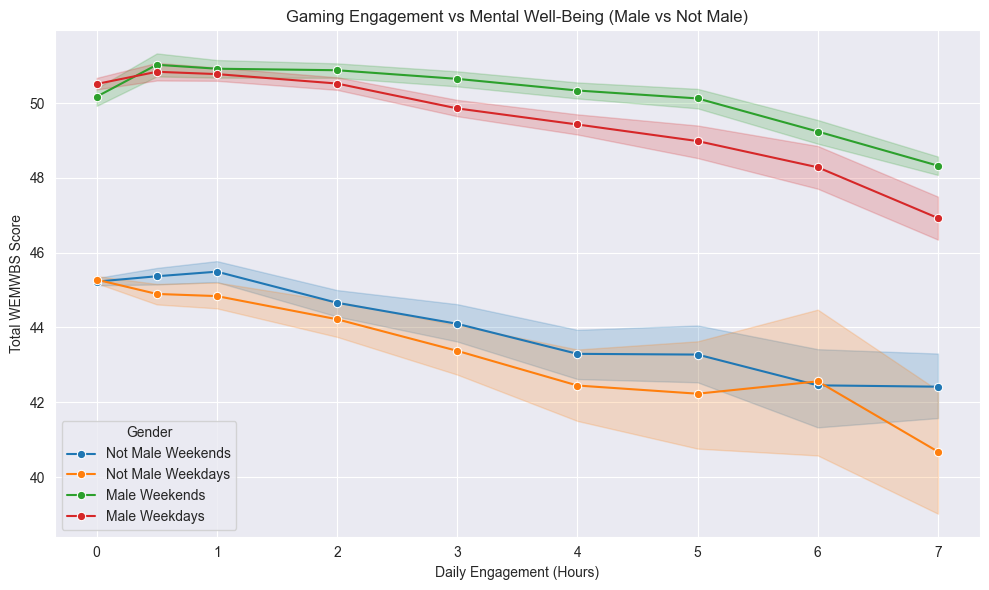

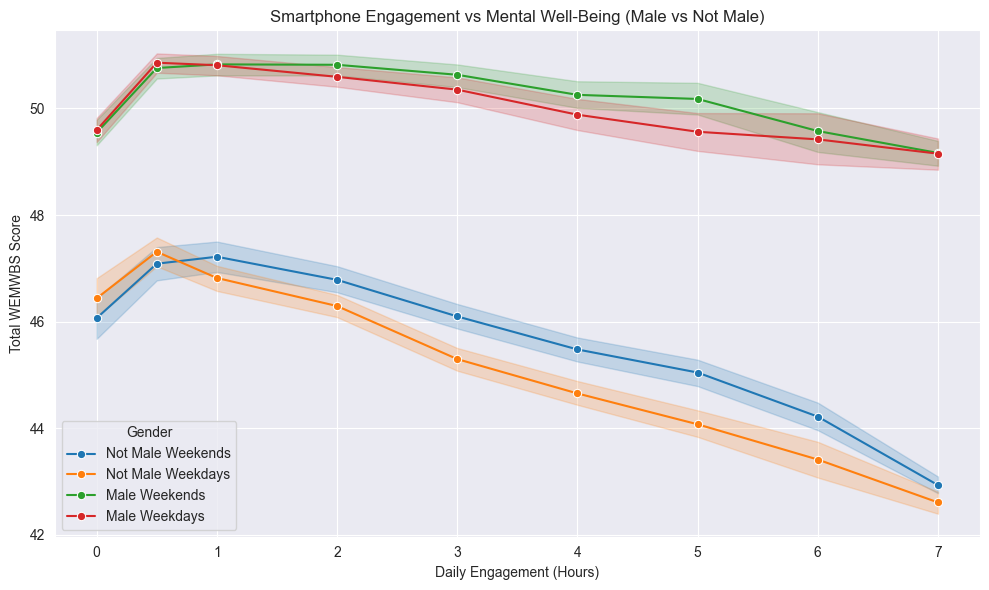

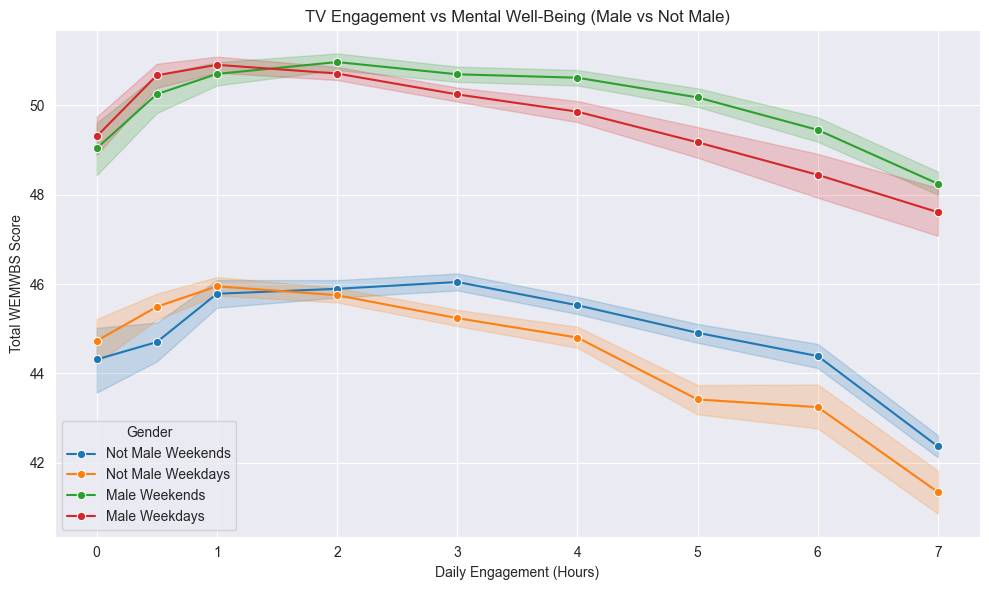

In [62]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
# Convert relevant columns to numeric, forcing errors to NaN
for column in ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr',
               'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the Total WEMWBS score based on selected columns
df['Total_WEMWBS'] = df[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr',
                         'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved',
                         'Intthg', 'Cheer']].sum(axis=1)

# Prepare data specifically for one device
def prepare_data_for_device(df, device, weekday_col, weekend_col):
    data_for_plot = {
        'Gender': [],
        'Hours': [],
        'Total_WEMWBS': [],
        'Day_Type': []
    }

    for index, row in df.iterrows():
      
        # Weekends
        data_for_plot['Gender'].append('Not Male Weekends' if row['gender'] == 0 else 'Male Weekends')
        data_for_plot['Hours'].append(row[weekend_col])
        data_for_plot['Total_WEMWBS'].append(row['Total_WEMWBS'])
        data_for_plot['Day_Type'].append('Weekends')
        
          # Weekdays
        data_for_plot['Gender'].append('Not Male Weekdays' if row['gender'] == 0 else 'Male Weekdays')
        data_for_plot['Hours'].append(row[weekday_col])
        data_for_plot['Total_WEMWBS'].append(row['Total_WEMWBS'])
        data_for_plot['Day_Type'].append('Weekdays')


    return pd.DataFrame(data_for_plot)

# Create function to generate plots for all devices
def plot_device_comparison(device, weekday_col, weekend_col):
    plot_df_device = prepare_data_for_device(df, device, weekday_col, weekend_col)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot with distinct labels for each combination of gender and day type
    sns.lineplot(data=plot_df_device,
                 x='Hours', y='Total_WEMWBS', hue='Gender', ax=ax,
                 marker='o', linestyle='-')

    # Set titles and labels
    ax.set_title(f'{device} Engagement vs Mental Well-Being (Male vs Not Male)')
    ax.set_xlabel('Daily Engagement (Hours)')
    ax.set_ylabel('Total WEMWBS Score')
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Plotting for all 4 devices
plot_device_comparison('Computer', 'C_wk', 'C_we')
plot_device_comparison('Gaming', 'G_wk', 'G_we')
plot_device_comparison('Smartphone', 'S_wk', 'S_we')
plot_device_comparison('TV', 'T_wk', 'T_we')


In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

# Convert relevant columns to numeric, forcing errors to NaN
for column in ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr',
               'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the Total WEMWBS score based on selected columns
df['Total_WEMWBS'] = df[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr',
                         'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved',
                         'Intthg', 'Cheer']].sum(axis=1)

# Separate male and non-male data
df_male = df[df['gender'] == 1]
df_non_male = df[df['gender'] == 0]

# Function to calculate best hours and WEMWBS scores for engagement
def calculate_best_hours_and_wemwbs_for_device_by_gender(df_gender, device, weekday_col, weekend_col):
    # Weekdays
    weekdays_group = df_gender.groupby(weekday_col)['Total_WEMWBS'].mean().reset_index()
    best_weekday_wemwbs = weekdays_group['Total_WEMWBS'].max()
    best_weekday_hours = weekdays_group[weekdays_group['Total_WEMWBS'] == best_weekday_wemwbs][weekday_col].mean()

    # Weekends
    weekends_group = df_gender.groupby(weekend_col)['Total_WEMWBS'].mean().reset_index()
    best_weekend_wemwbs = weekends_group['Total_WEMWBS'].max()
    best_weekend_hours = weekends_group[weekends_group['Total_WEMWBS'] == best_weekend_wemwbs][weekend_col].mean()

    # Return the rounded results (zero decimal places)
    return round(best_weekday_hours, 2), round(best_weekday_wemwbs, 2), round(best_weekend_hours, 2), round(best_weekend_wemwbs, 2)

# Devices and their corresponding columns for weekday and weekend engagement
devices = {'Computer': ('C_wk', 'C_we'), 'Gaming': ('G_wk', 'G_we'),
           'Smartphone': ('S_wk', 'S_we'), 'TV': ('T_wk', 'T_we')}

# Calculate for all devices for both male and non-male
best_hours_wemwbs_summary_male = {}
best_hours_wemwbs_summary_non_male = {}

for device, (weekday_col, weekend_col) in devices.items():
    best_hours_wemwbs_summary_male[device] = calculate_best_hours_and_wemwbs_for_device_by_gender(df_male, device, weekday_col, weekend_col)
    best_hours_wemwbs_summary_non_male[device] = calculate_best_hours_and_wemwbs_for_device_by_gender(df_non_male, device, weekday_col, weekend_col)

# Creating a DataFrame to display the results for both male and non-male including rounded WEMWBS scores
best_hours_wemwbs_df = pd.DataFrame({
    'Best Weekday Hours (Male)': [best_hours_wemwbs_summary_male[device][0] for device in devices],
    'Best Weekday WEMWBS (Male)': [best_hours_wemwbs_summary_male[device][1] for device in devices],
    'Best Weekend Hours (Male)': [best_hours_wemwbs_summary_male[device][2] for device in devices],
    'Best Weekend WEMWBS (Male)': [best_hours_wemwbs_summary_male[device][3] for device in devices],
    'Best Weekday Hours (Non-Male)': [best_hours_wemwbs_summary_non_male[device][0] for device in devices],
    'Best Weekday WEMWBS (Non-Male)': [best_hours_wemwbs_summary_non_male[device][1] for device in devices],
    'Best Weekend Hours (Non-Male)': [best_hours_wemwbs_summary_non_male[device][2] for device in devices],
    'Best Weekend WEMWBS (Non-Male)': [best_hours_wemwbs_summary_non_male[device][3] for device in devices]
}, index=devices.keys())

# Save the DataFrame to a CSV file
csv_file_path = 'best_hours_wemwbs_male_non_male.csv'  # Replace with the desired path
best_hours_wemwbs_df.to_csv(csv_file_path, index=True)

# Display the DataFrame (for debugging or verification)
print(best_hours_wemwbs_df)




            Best Weekday Hours (Male)  Best Weekday WEMWBS (Male)  \
Computer                          1.0                       50.79   
Gaming                            0.5                       50.84   
Smartphone                        0.5                       50.86   
TV                                1.0                       50.90   

            Best Weekend Hours (Male)  Best Weekend WEMWBS (Male)  \
Computer                          1.0                       50.81   
Gaming                            0.5                       51.02   
Smartphone                        1.0                       50.83   
TV                                2.0                       50.96   

            Best Weekday Hours (Non-Male)  Best Weekday WEMWBS (Non-Male)  \
Computer                              1.0                           45.96   
Gaming                                0.0                           45.28   
Smartphone                            0.5                           47.31   


In [27]:
WEMWBS=['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme',
                         'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
df['Total_WEMWBS']=df[WEMWBS].sum(axis=1)
print(df)

       gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  T_we  \
0           0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   4.0   
1           0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   4.0   
2           0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   3.0   
3           0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   4.0   
4           0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   2.0   
...       ...       ...       ...   ...   ...   ...   ...   ...   ...   ...   
98273       1         0         1   7.0   7.0   7.0   7.0   7.0   7.0   7.0   
98274       1         0         1   7.0   5.0   7.0   5.0   7.0   6.0   7.0   
98275       1         0         1   5.0   5.0   5.0   5.0   5.0   5.0   5.0   
98276       1         0         1   6.0   6.0   5.0   3.0   7.0   7.0   7.0   
98277       1         0         1   6.0   6.0   5.0   3.0   7.0   5.0   6.0   

       ...  Dealpr  Thcklr  Goodme  Clsep  Conf  Mk

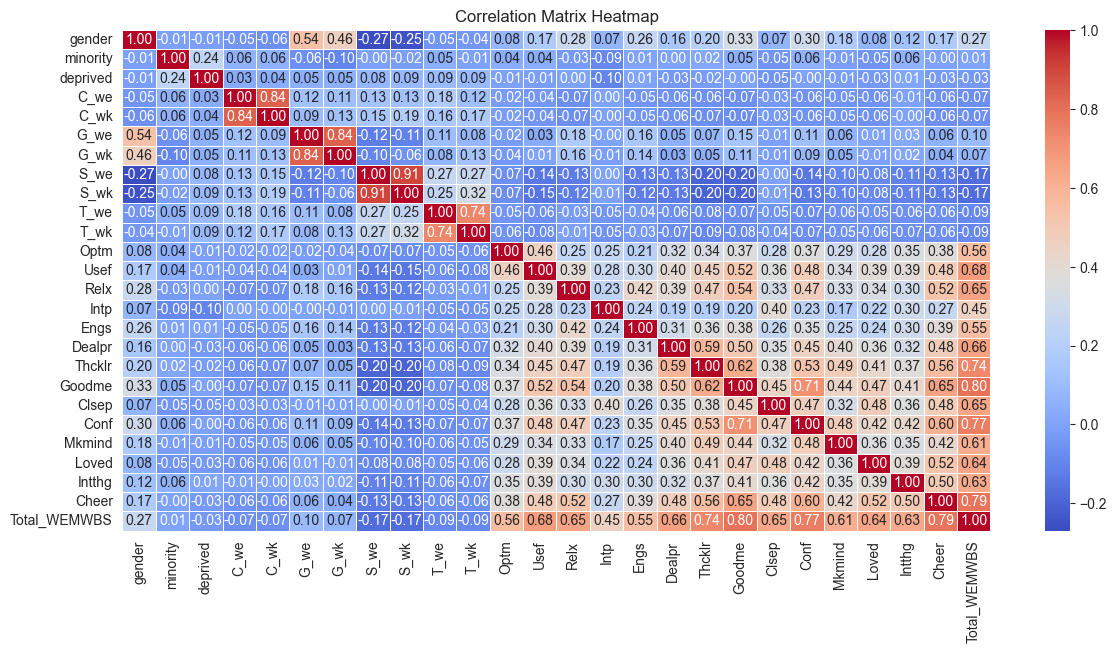

In [28]:
# Get the name of the first column
first_column = df.columns[0]

# Drop the first column
df = df.drop(first_column, axis=1)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 6.5))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

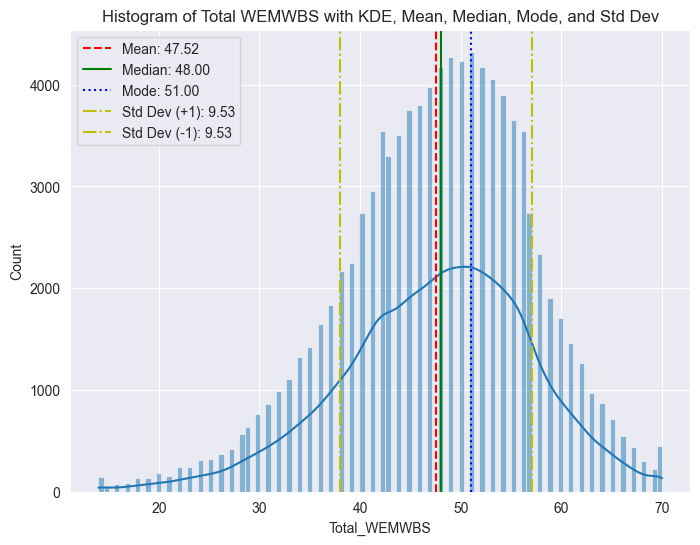

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean, median, mode, and standard deviation
mean_wemwbs = df['Total_WEMWBS'].mean()
median_wemwbs = df['Total_WEMWBS'].median()
mode_wemwbs = df['Total_WEMWBS'].mode()[0]
std_wemwbs = df['Total_WEMWBS'].std()

# Plot histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_WEMWBS'], kde=True)

# Add lines for mean, median, mode, and std
plt.axvline(mean_wemwbs, color='r', linestyle='--', label=f'Mean: {mean_wemwbs:.2f}')
plt.axvline(median_wemwbs, color='g', linestyle='-', label=f'Median: {median_wemwbs:.2f}')
plt.axvline(mode_wemwbs, color='b', linestyle=':', label=f'Mode: {mode_wemwbs:.2f}')

# Add standard deviation (lines at mean ± 1 std)
plt.axvline(mean_wemwbs + std_wemwbs, color='y', linestyle='-.', label=f'Std Dev (+1): {std_wemwbs:.2f}')
plt.axvline(mean_wemwbs - std_wemwbs, color='y', linestyle='-.', label=f'Std Dev (-1): {std_wemwbs:.2f}')

# Add title and legend
plt.title('Histogram of Total WEMWBS with KDE, Mean, Median, Mode, and Std Dev')
plt.legend()

# Show the plot
plt.show()


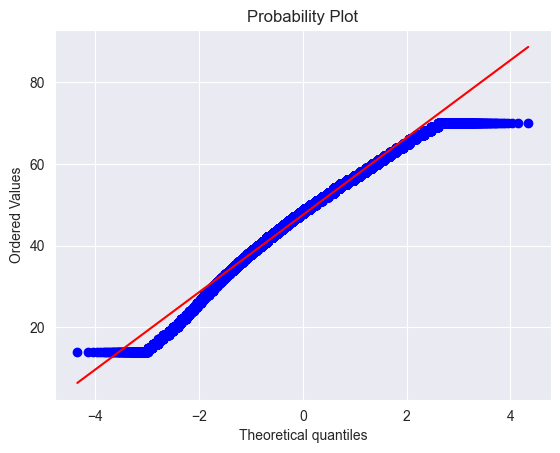

In [66]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Total_WEMWBS'], dist="norm", plot=plt)
plt.show()
